# Banking Customer Churn Prediction

# Load & Prepare Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
#Loading data
df = pd.read_csv(r"C:\Users\user\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Checking the data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#checking for high and low cardinality columns
df.select_dtypes("object").nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

# Explore Data

In [7]:
#Calculating summary statistics to see if there are outliers in the data and if its skewed
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

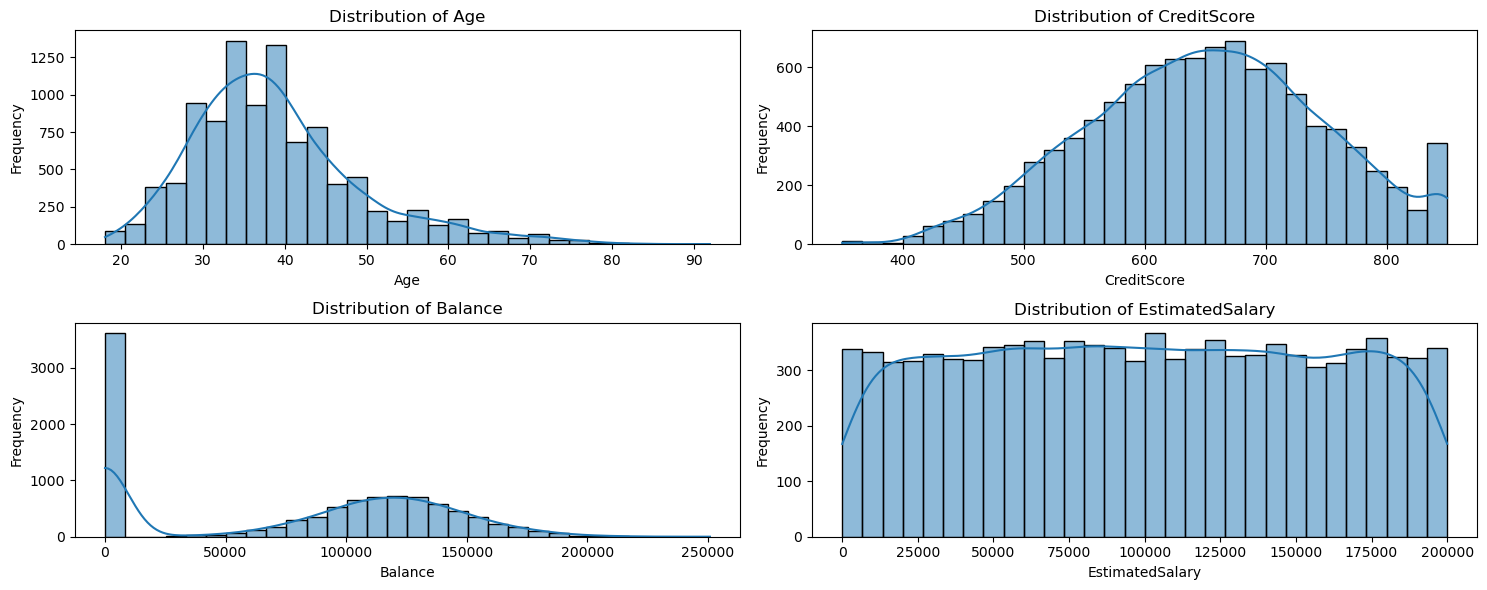

In [8]:
# Histogram distributions for each feature
plt.figure(figsize=(15, 6))
x_value = ["Age", "CreditScore", "Balance", "EstimatedSalary"]
for i, x_value in enumerate(x_value, 1):  
    plt.subplot(2, 2, i) 
    sns.histplot(x=x_value, data=df, bins=30, kde=True)
    plt.title(f"Distribution of {x_value}")  
    plt.xlabel(x_value)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show();

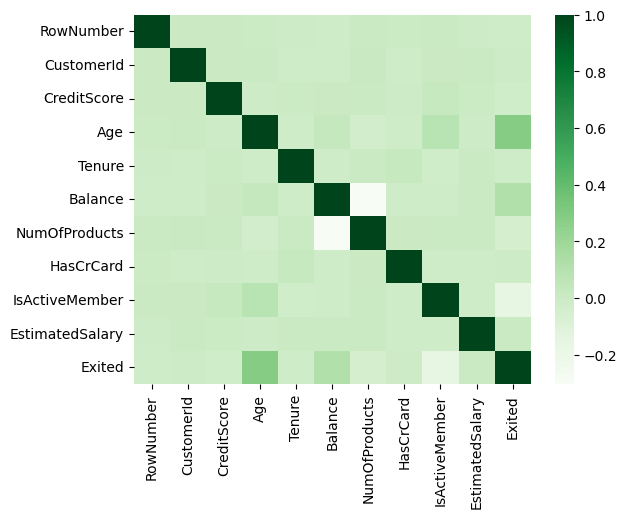

In [9]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr, cmap = "Greens"); 

In [10]:
#Creating age groups to see how specific age groups influence churn
bins = [18, 24, 34, 44, 54, 64, 74, 94]  #defining bins
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-94'] #defining labes
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True) #assigning groups
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44


C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


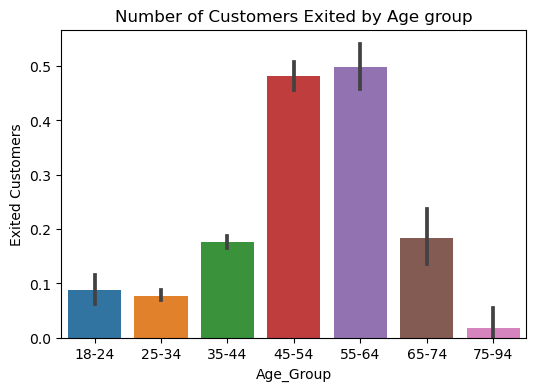

In [11]:
#Bar graph visualisation of the age_group vs churn
plt.figure(figsize=(6, 4))
sns.barplot(x ="Age_Group", y ="Exited", data = df)
plt.xlabel("Age_Group")
plt.ylabel("Exited Customers")
plt.title("Number of Customers Exited by Age group")
plt.show();

In [12]:
#Creating new feature "has balance" to see how no balance accounts affect churn
df["HasBalance"] = df["Balance"].apply(lambda x: 1 if x > 0 else 0)
print(df["HasBalance"].value_counts())

HasBalance
1    6383
0    3617
Name: count, dtype: int64


In [13]:
#Analysis of churn rate for HasBalance
df.groupby("HasBalance")["Exited"].mean()

HasBalance
0    0.138236
1    0.240796
Name: Exited, dtype: float64

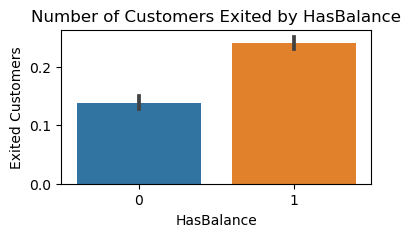

In [14]:
#Visual of how hasbalance affect churn
plt.figure(figsize=(4, 2))
sns.barplot(x ="HasBalance", y ="Exited", data = df)
plt.xlabel("HasBalance")
plt.ylabel("Exited Customers")
plt.title("Number of Customers Exited by HasBalance")
plt.show();

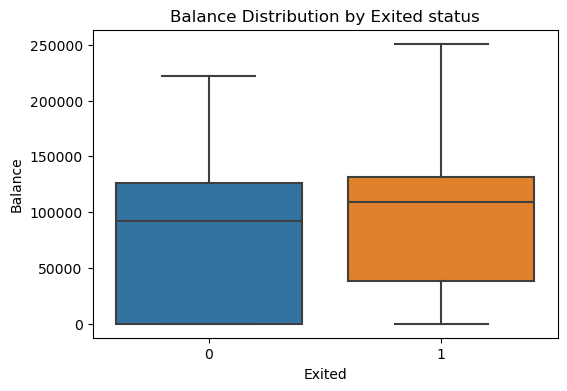

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x ="Exited", y ="Balance", data = df)
plt.title("Balance Distribution by Exited status")
plt.show();

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


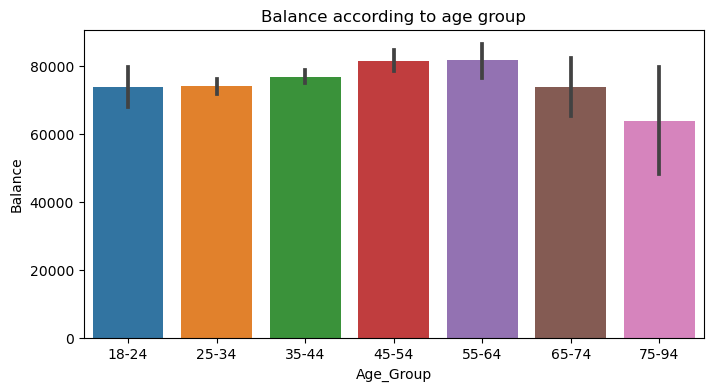

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(x ="Age_Group", y ="Balance", data = df)
plt.xlabel("Age_Group")
plt.ylabel("Balance")
plt.title("Balance according to age group")
plt.show();

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


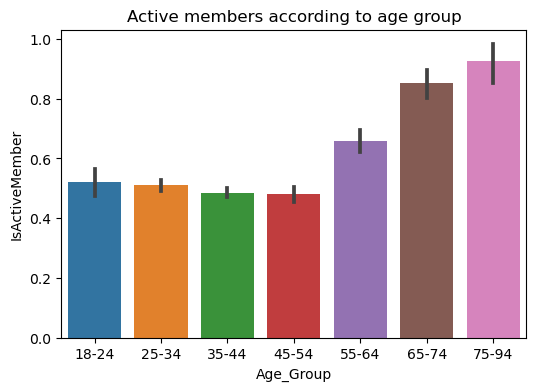

In [17]:
#Checking active membership by age group
plt.figure(figsize=(6, 4))
sns.barplot(x ="Age_Group", y ="IsActiveMember", data = df)
plt.xlabel("Age_Group")
plt.ylabel("IsActiveMember")
plt.title("Active members according to age group")
plt.show();

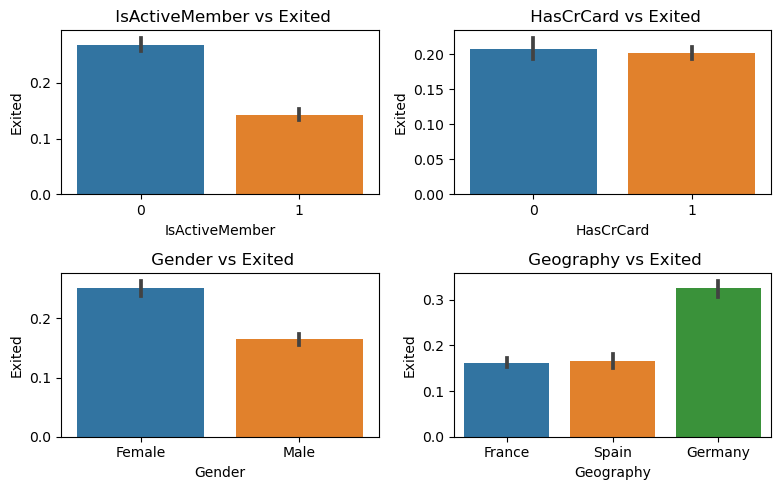

In [18]:
#Customer churn by country, by gender, by credit_card avalilabity and active membership
plt.figure(figsize=(8, 5))
x_value = ["IsActiveMember", "HasCrCard", "Gender", "Geography"]

for i, x_value in enumerate(x_value, 1):  
    plt.subplot(2, 2, i) 
    sns.barplot(x=x_value,  y= "Exited", data=df )
    plt.title(f' {x_value}' " vs Exited")  
    plt.xlabel(x_value)
    
plt.tight_layout()
plt.show();

In [19]:
#Number of customers per gender
Gender_of_Customer = df.groupby('Gender')['CustomerId'].size().reset_index()
Gender_of_Customer.columns = ['Gender','Counts']
Gender_of_Customer

,Gender,Counts
0,Female,4543
1,Male,5457


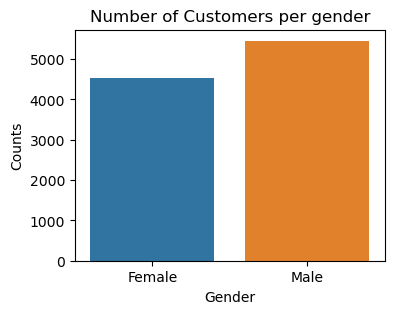

In [20]:
#CustomerId and by gender
plt.figure(figsize=(4, 3))
sns.barplot(x ="Gender", y ="Counts", data =Gender_of_Customer)
plt.xlabel("Gender")
plt.title("Number of Customers per gender")
plt.show();

In [21]:
#Number of customers per country
Country_of_Customer = df.groupby('Geography')['CustomerId'].size().reset_index()
Country_of_Customer.columns = ['Geography','Counts']
Country_of_Customer

,Geography,Counts
0,France,5014
1,Germany,2509
2,Spain,2477


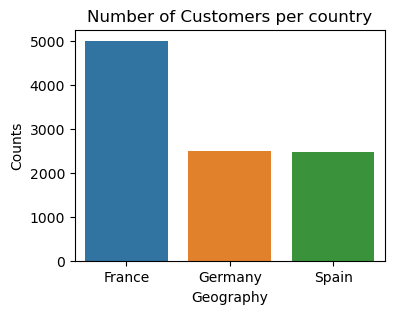

In [22]:
#CustomerId and by country
plt.figure(figsize=(4, 3))
sns.barplot(x ="Geography", y ="Counts", data =Country_of_Customer)
plt.xlabel("Geography")
plt.title("Number of Customers per country")
plt.show();

# Split Data

In [23]:
#Splitting Features and target
X = df.drop(columns=['CustomerId', 'Surname', 'Exited', 'RowNumber', 'Age_Group', 'HasBalance'])  # Remove irrelevant columns
y = df['Exited']

#Feature types
num_features = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance','Tenure', 'NumOfProducts']
cat_features = ['Geography','Gender']
binary_features = ['HasCrCard','NumOfProducts', 'IsActiveMember']

# Create column transformer (scaling + encoding)
preprocessor = ColumnTransformer([
    ('num_scaler', StandardScaler(), num_features),  # Standardize numerical data
    ('cat_encoder', OneHotEncoder(drop='first'), cat_features)  # One-hot encode categorical data
], remainder='passthrough') #Binary data should remain as it is



In [24]:
#Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a Model

In [25]:
# importing libraries
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Smote for class balancing
smote = SMOTE(random_state=42)

# Create a pipeline 
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state = 42))
])

In [26]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary', 'Balance',
                                                   'Tenure', 'NumOfProducts']),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

# Predictions & Accuracy

In [27]:
#Predictions
y_pred = pipeline.predict(X_test)


# Evaluate Model Performance

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
print("Testing data Accuracy:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))




Testing data Accuracy:
Accuracy: 0.717
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



[[1151  442]
 [ 124  283]]


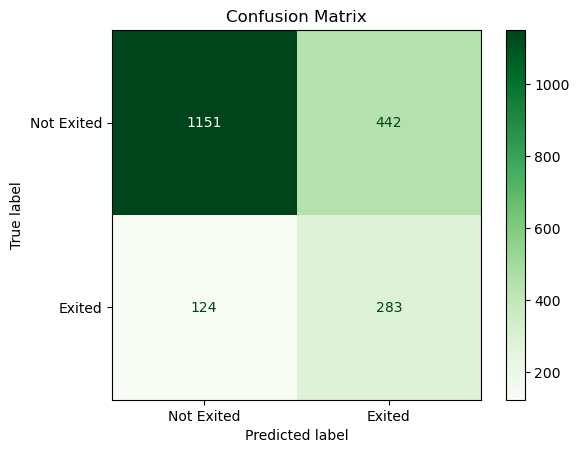

In [29]:
#Confusio matrix for evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Exited', 'Exited'])
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix")
plt.show();

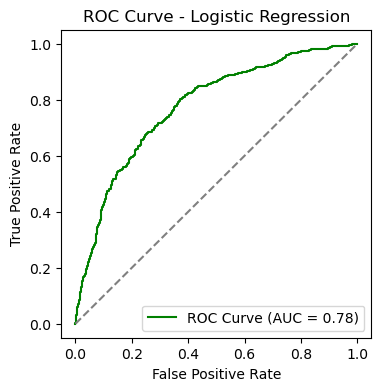

In [45]:
# Get prediction probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show();


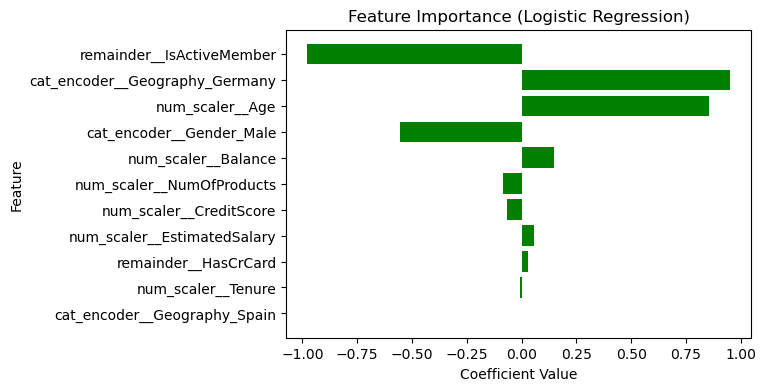

In [31]:
# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get model coefficients
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Sort features by importance
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.barh(np.array(feature_names)[sorted_idx], coefficients[sorted_idx], color='green')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important first
plt.show();


## Using a different model(Random Forest) to improve accuracy

In [32]:
#Importing random forest
from sklearn.ensemble  import RandomForestClassifier

In [37]:
#Training the model
# Create a pipeline 
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42))
])

#Fit the pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary', 'Balance',
                                                   'Tenure', 'NumOfProducts']),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [38]:
y_predictions = rf_pipeline.predict(X_test)

[[1540   53]
 [ 228  179]]


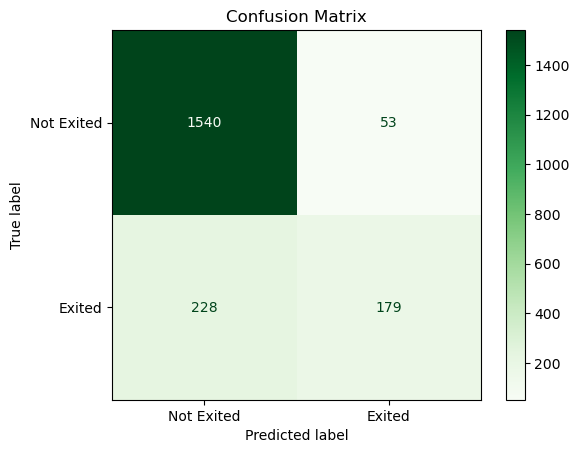

Testing data Accuracy:
Accuracy: 0.8595
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [40]:
cm = confusion_matrix(y_test, y_predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Exited', 'Exited'])
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix")
plt.show();

#Classification Report
print("Testing data Accuracy:")
print("Accuracy:", accuracy_score(y_test, y_predictions))
print(classification_report(y_test,y_predictions))

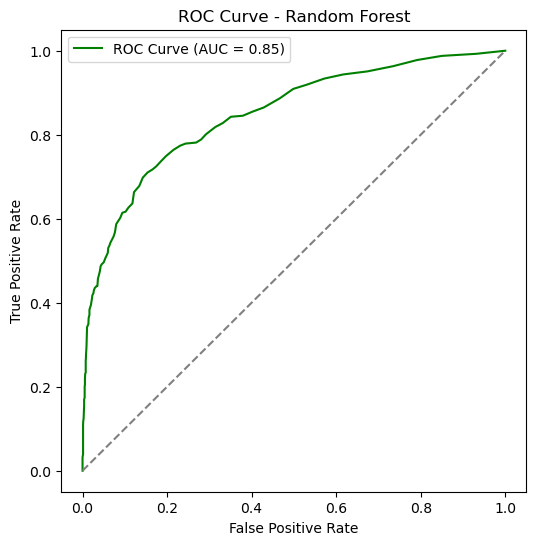

In [43]:
# Get prediction probabilities
y_probs = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show();